In [1]:
#import common modules
import numpy as np
from sklearn.model_selection import train_test_split

#import own modules
from source.matrix_creation import polynomial_features,scale_features_by_intercept_use,standard_scaler
from source.plotting_exploration import explore_eta,explore_n
from source.plotting_exploration import plot_mse,plot_r2
from source.plotting_exploration import explore_iterations_GD_methods_ridge,explore_iterations_GD_methods_OLS
from source.plotting_exploration import explore_n_epochs_stochasticGD_ridge,explore_n_epochs_stochasticGD_OLS

## Notebook for assignment 1 parts c,d

Generating analysis plots for assignement 1 parts c) and d) exploring Gradient descent for various methods for updating the learning rate. 

* Functions for the main methods can be found in source/GD_OLS.py and source/GD_Ridge.py
* Functions generating and scaling the feature matrix can be found in source/matrix_creation.py 
* Functions for calculating errors can be found in source/errors.py
* Functions for plotting and exploration can be found in source/plotting_exploration.py


### Setup for constants

In [34]:
# Runge's function - parameters to explore
n_datapoints = 400
standard_deviation = 0.1 # for noise
p = 15 # polynomial degree

lambda_range = (-1,-5) # range of lambda values for np.log
lambda_n = 20 # number lambda values to explore
lambdas_start = np.logspace(lambda_range[0],lambda_range[1],lambda_n) # lambdas generated in logspace for learning rate

# tolerance criteria for gradient descent methods
tolerance = 1e-6
max_iterations = 1000

use_intercept = True 
create_plots = False
verbose_bool = False

np.random.seed(250)  # ensure reproducibility numpy
random_state_int = 42   # ensure reproducibility train_test_split

#### Constants for analysis

In [35]:
eta_list = [0.00001,0.0001,0.001, 0.01, 0.1,0.12,0.121] 
num_iters = 1000

iter_list = [10,50,100,1000,10000,100000]
eta = 0.001
lam = 0.01

### Generate Runge's function data

#### No noise

In [36]:
# generating data without noise
x = np.linspace(-1, 1, num=n_datapoints)
y = 1 / (1 + 25 * x**2)

#### With noise

In [37]:
# generating data with noise
x_noise = x
y_noise = 1 / (1 + 25 * x_noise**2) + np.random.normal(0, standard_deviation, n_datapoints)

### Generate feature matrix, scale and split into training and test data

#### No noise

In [38]:
# creating design matrix with polynomial features: p
X = polynomial_features(x, p,intercept=use_intercept) # intercept=True gives intercept column = 0 in standard scaler if intercept is True, and hence division by 0. 

# split x for plotting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state_int)
# test and train dataset, and scaling of X_train and X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state_int)
X_train_scaled, X_test_scaled, X_train_mean, X_train_std = scale_features_by_intercept_use(X_train, X_test, use_intercept)
# scaling of y_train and y_test
y_train_scaled, y_test_scaled, y_train_mean, y_train_std = standard_scaler(y_train, y_test)

#### With noise

In [39]:
# creating design matrix with polynomial features: p
X_noise = polynomial_features(x_noise, p,intercept=use_intercept) # intercept=True gives intercept column = 0 in standard scaler if intercept is True, and hence division by 0. Leaving intercept out since Ridge regression handles this

# test and train dataset, and scaling of X_train and X_test
x_train_noise, x_test_noise, y_train_noise, y_test_noise = train_test_split(x_noise, y_noise, test_size=0.2, random_state=random_state_int)
X_train_noise, X_test_noise, y_train_noise, y_test_noise = train_test_split(X_noise, y_noise, test_size=0.2, random_state = random_state_int)
X_train_scaled_noise, X_test_scaled_noise, X_mean, X_std = scale_features_by_intercept_use(X_train_noise, X_test_noise, use_intercept)
# scaling of y_train and y_test
y_train_scaled_noise, y_test_scaled_noise, y_train_mean_noise, y_train_std_noise = standard_scaler(y_train_noise, y_test_noise)

### Analysis

#### Explore Gradient descent using OLS & Ridge for various eta, with no noise

In [40]:
import matplotlib.pyplot as plt

0.11242588577850897
0.09397968350009381
0.052847431065203426
0.0310612822364312
0.018620113475029648
0.01764337646736625
0.017597094557748053


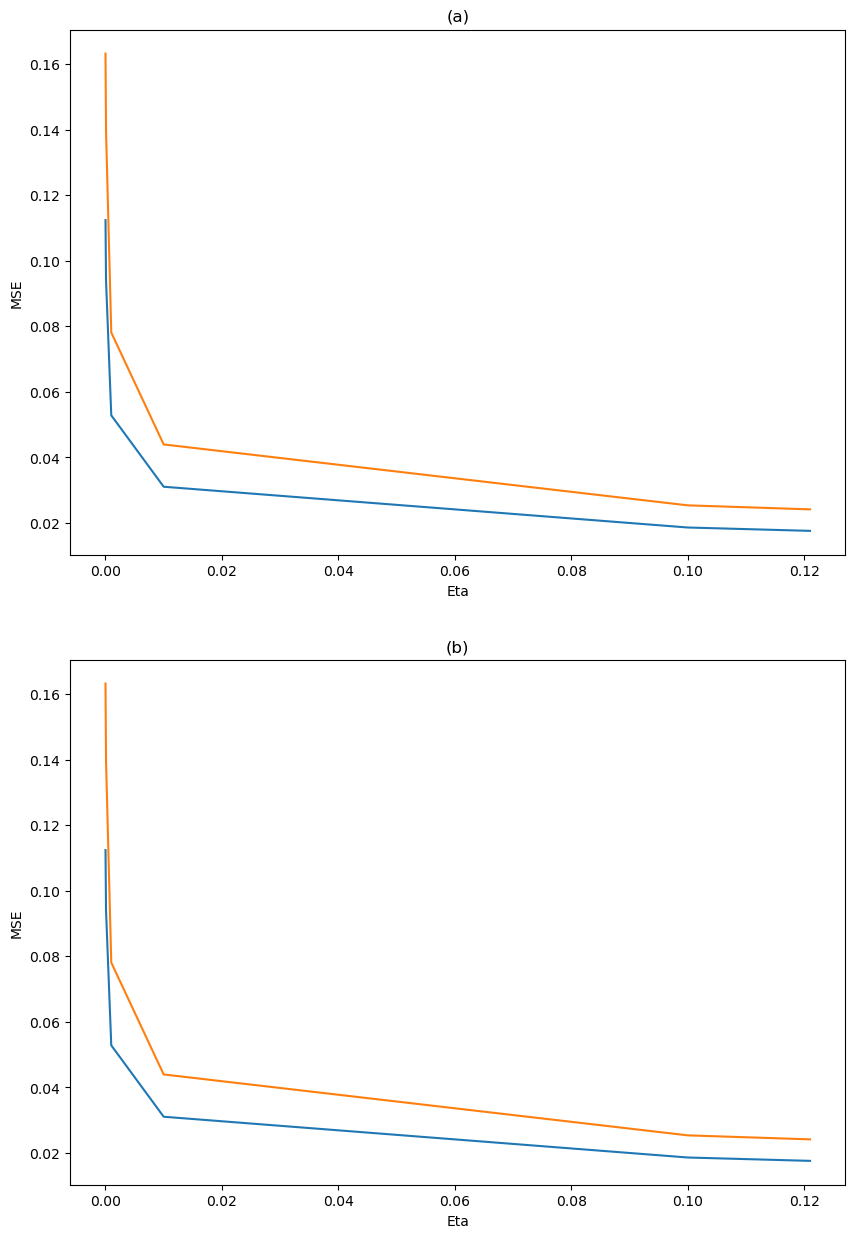

In [41]:
eta_list,mse_train_OLS,mse_test_OLS,mse_train_Ridge,mse_test_Ridge,r2_train_gdOLS,r2_test_Ridge = explore_eta(X_train,X_test,y_train,y_test,num_iters,eta_list,lam,verbose=False)

fig = plt.figure(figsize=(10,15))
ax1 = plt.subplot(2,1,1)
ax1.plot(eta_list,mse_test_OLS)
ax1.plot(eta_list,mse_train_OLS)
ax1.set_xlabel("Eta")
ax1.set_ylabel("MSE")
ax1.set_title("(a)")

ax2 = plt.subplot(2,1,2)
ax2.plot(eta_list,mse_test_OLS)
ax2.plot(eta_list,mse_train_OLS)
ax2.set_xlabel("Eta")
ax2.set_ylabel("MSE")
ax2.set_title("(b)")

plt.savefig("mse_gradient_descent_temp.png")



#### Explore Gradient descent using OLS & Ridge for various eta, with noise

In [42]:
etas,mse_train_OLS,mse_test_OLS,mse_train_Ridge,mse_test_Ridge,r2_train_gdOLS,r2_test_Ridge = explore_eta(X_train,X_test,y_train,y_test,num_iters,eta_list,lam,verbose=False)
plot_mse(n_datapoints,etas,"Gradient descent for Oridnary least squares varying Etas,\n and 1000 iterations",mse_train_OLS,mse_test_OLS)
plot_mse(n_datapoints,etas,"Gradient descent for Ridge regression varying Etas,\n and 1000 iterations",mse_train_Ridge,mse_test_Ridge)


0.11242588577850897
0.09397968350009381
0.052847431065203426
0.0310612822364312
0.018620113475029648
0.01764337646736625
0.017597094557748053


TypeError: plot_mse() missing 1 required positional argument: 'mse_test'

#### Explore Gradient descent using OLS & Ridge for various number of iterations, with no noise

In [ ]:
iter_list,mse_train_OLS,mse_test_OLS,mse_train_Ridge,mse_test_Ridge,r2_train_gdOLS,r2_test_Ridge = explore_n(X_train,X_test,y_train,y_test,iter_list,lam,eta,verbose=False)

plot_mse(n_datapoints,iter_list,"Gradient descent for Oridnary least squares varying iterations,\n and eta 0.15",mse_train_OLS,mse_test_OLS)
plot_mse(n_datapoints,iter_list,"Gradient descent for Ridge regression varying varying iterations,\n and eta 0.15",mse_train_Ridge,mse_test_Ridge)
print(mse_test_Ridge)

#### Explore Gradient descent using OLS & Ridge for various number of iterations, with noise

In [ ]:
iter_list,mse_train_OLS,mse_test_OLS,mse_train_Ridge,mse_test_Ridge,r2_train_gdOLS,r2_test_Ridge = explore_n(X_train,X_test,y_train,y_test,iter_list,lam,eta,verbose=False)

plot_mse(n_datapoints,iter_list,"Gradient descent for Oridnary least squares varying iterations,\n and eta 0.15",mse_train_OLS,mse_test_OLS)
plot_mse(n_datapoints,iter_list,"Gradient descent for Ridge regression varying varying iterations,\n and eta 0.15",mse_train_Ridge,mse_test_Ridge)
print(mse_test_Ridge)

#### Explore Gradient descent using OLS, with different ways of updating the learning rate, for various number of iterations, with no noise

In [ ]:
explore_iterations_GD_methods_OLS(iter_list,eta,
                                  x,y,
                                  x_train,x_test,
                                  X_train_scaled,X_test_scaled,
                                  y_train)

#### Explore Gradient descent using OLS, with different ways of updating the learning rate, for various number of iterations, with noise

In [ ]:
explore_iterations_GD_methods_OLS(iter_list,eta,
                                  x,y,
                                  x_train,x_test,
                                  X_train_scaled,X_test_scaled,
                                  y_train)

#### Explore Gradient descent using ridge regression, with different ways of updating the learning rate, for various number of iterations, with no noise

In [ ]:
explore_iterations_GD_methods_ridge(iter_list,eta,lam,
                                    x,y,
                                    x_train,x_test,
                                    X_train_scaled,X_test_scaled,
                                    y_train)

#### Explore Gradient descent using ridge regression, with different ways of updating the learning rate, for various number of iterations, with noise

In [ ]:
explore_iterations_GD_methods_ridge(iter_list,eta,lam,
                                    x,y,
                                    x_train,x_test,
                                    X_train_scaled,X_test_scaled,
                                    y_train)